In [12]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
# import tqdm

In [138]:
# parameters:
batch_size = 64
learning_rate = 0.001
momentum = 0.5
epoch = 10

### 先跑通一个项目：
Ref：https://blog.csdn.net/qq_45588019/article/details/120935828

In [2]:
# MNIST Download
# data preprocess:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=0.1307,std=0.3081)]
)
# get Dataset
train_dataset = datasets.MNIST(root=r'D:\\internWorkspace\\dataset',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root=r'D:\\internWorkspace\\dataset',train=False,download=True,transform=transform)


train data shape:torch.Size([60000, 28, 28])
test data shape:torch.Size([10000, 28, 28])
train label shape:torch.Size([60000])
test label shape:torch.Size([10000])
single data shape:torch.Size([28, 28])


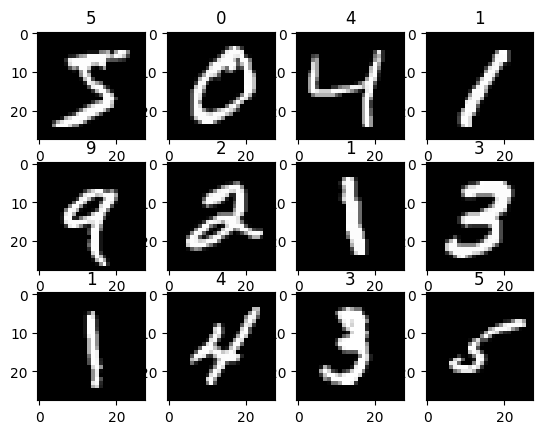

In [4]:
# show MNIST
# MNIST shape:
print("train data shape:{}".format(train_dataset.data.shape))
print("test data shape:{}".format(test_dataset.data.shape))
print("train label shape:{}".format(train_dataset.targets.shape))
print("test label shape:{}".format(test_dataset.targets.shape))
print("single data shape:{}".format(train_dataset.data[0].shape))
# img
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(train_dataset.data[i],cmap='gray')
    plt.title('{}'.format(train_dataset.targets[i]))
plt.show()
plt.close(fig)

In [35]:
# CNN 
class CNN_net(torch.nn.Module):
    def __init__(self):
        super(CNN_net,self).__init__() # 调用父类构造函数，继承父类的一些属性
        self.cnn1 = torch.nn.Sequential(
            torch.nn.Conv2d(1,10,kernel_size=5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )
        self.cnn2 = torch.nn.Sequential(
            torch.nn.Conv2d(10,20,kernel_size=5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(320,50),
            torch.nn.Linear(50,10)
        )

    def forward(self,x):
        batch_size = x.size(0)
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = x.view(batch_size,-1)
        x = self.fc(x)
        return x

In [17]:
class MyCNN(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super(MyCNN,self).__init__(*args, **kwargs)
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
        self.maxpool= torch.nn.MaxPool2d(kernel_size=2)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
        self.fc1 = torch.nn.Linear(320,50)
        self.fc2 = torch.nn.Linear(50,10)

    def forward(self,x):
        batch_size = x.size(0)
        # first block
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        # seconde block
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        # linear
        x = x.view(batch_size,-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [54]:
# create model:
CNN = CNN_net()
# CNN = MyCNN()

In [53]:
# dataloader
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size = batch_size,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size = batch_size,
                              shuffle=True)

In [57]:
# optimizer:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN.parameters(),lr=learning_rate)

In [48]:
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs,targets = data
            outputs = CNN(inputs)

            _,predicted = torch.max(outputs.data,dim=1)
            correct+=(targets==predicted).sum().item()
            total += inputs.shape[0]
        acc = correct/total
    return acc

In [55]:
# train:
def train():
    epoch = 10
    loss_lists = []
    for e in range(epoch):
        train_loss = 0
        total = 0
        correct = 0
        for _ ,data in enumerate(train_dataloader):
            inputs,targets = data
            # train
            outputs = CNN(inputs)
            loss = criterion(outputs,targets)
            # loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # compute:
            train_loss += loss.item()
            _,predicted = torch.max(outputs.data,dim=1)
            total+=inputs.shape[0]
            correct+=(targets==predicted).sum().item()
            
            
        # save loss:
        loss_lists.append(loss.detach().numpy())
        acc = correct/total*100
        print("epoch {}: loss {} acc {}".format(e,loss,acc))

        if (e+1)%5==0:
            acc = test()
            print("Accuracy on test in epoch {}:{}%".format(e,acc*100))
        
    # show:
    fig = plt.figure()
    plt.plot(np.arange(0,len(loss_lists),1),loss_lists)
    plt.show()
    plt.close(fig)

epoch 0: loss 0.09601308405399323 acc 91.29
epoch 1: loss 0.0031613633036613464 acc 97.28
epoch 2: loss 0.004897576756775379 acc 97.78666666666666
epoch 3: loss 0.16583962738513947 acc 97.86
epoch 4: loss 0.15194891393184662 acc 97.82499999999999
Accuracy on test in epoch 4:98.2%
epoch 5: loss 0.006416266318410635 acc 97.69833333333334
epoch 6: loss 0.039574675261974335 acc 97.47333333333333
epoch 7: loss 0.03512060269713402 acc 97.42666666666666
epoch 8: loss 0.0008922955603338778 acc 97.465
epoch 9: loss 0.005199269391596317 acc 97.315
Accuracy on test in epoch 9:96.43%


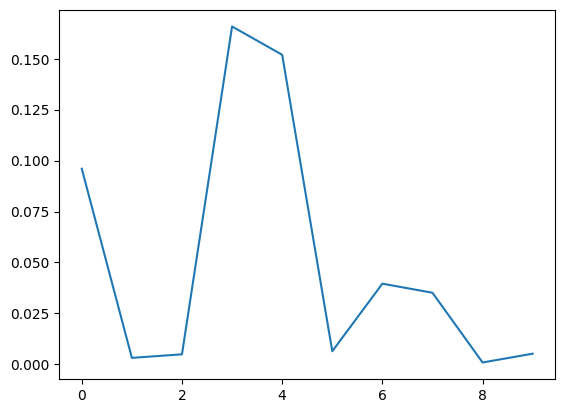

In [58]:
if __name__ == '__main__':
    train()

### Pretrained Model:
- ResNet50
- AlexNet

In [59]:
import torchvision.models as models
import torchvision.utils as utils

In [148]:
def get_MNIST(transform):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Lambda(lambda x:x.repeat(3,1,1)),
         transform]
    )
    train_dataset = datasets.MNIST(root=r'D:\\internWorkspace\\dataset',train=True,download=False,transform=transform)
    test_dataset = datasets.MNIST(root=r'D:\\internWorkspace\\dataset',train=False,download=False,transform=transform)
    return train_dataset,test_dataset

In [85]:
def show_MNIST(train_dataset,test_dataset):
    # show MNIST
    # MNIST shape:
    print("train data shape:{}".format(train_dataset.data.shape))
    print("test data shape:{}".format(test_dataset.data.shape))
    print("train label shape:{}".format(train_dataset.targets.shape))
    print("test label shape:{}".format(test_dataset.targets.shape))
    print("single data shape:{}".format(train_dataset.data[0].shape))
    # img
    fig = plt.figure()
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(train_dataset.data[i],cmap='gray')
        plt.title('{}'.format(train_dataset.targets[i]))
    plt.show()
    plt.close(fig)

In [70]:
def get_dataloader(train_dataset,test_dataset):
    # dataloader
    train_dataloader = DataLoader(dataset=train_dataset,
                                batch_size = batch_size,
                                shuffle=True)
    test_dataloader = DataLoader(dataset=test_dataset,
                                batch_size = batch_size,
                                shuffle=True)
    return train_dataloader,test_dataloader

In [95]:
# ResNet50
resnet50 = models.resnet50()
resnet50_weights = torch.load('./modelweights/resnet50-0676ba61.pth')
resnet50.load_state_dict(resnet50_weights)
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [158]:
# 第一种方法：直接修改
# modify parameter:
# fc output(原)：1000 -> 10
fc_features = resnet50.fc.in_features
resnet50.fc = torch.nn.modules.Linear(fc_features,10)
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [159]:
# preprocess data:
resnet50_trans = models.ResNet50_Weights.DEFAULT.transforms()
train_dataset,test_dataset = get_MNIST(resnet50_trans)

In [119]:
# prediction
def test(test_model,test_dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs,targets = data
            outputs = test_model(inputs)
            _,predicted = torch.max(outputs.data,dim=1)
            print(predicted)
            correct+=(targets==predicted).sum().item()
            total += inputs.shape[0]
            break
            
        acc = correct/total
    return acc

In [105]:
# Resnet50 predict:
train_dataloader,test_dataloader = get_dataloader(train_dataset,test_dataset)
acc = test(resnet50,test_dataloader)
print("Accuracy on test:{}%".format(acc*100))

d:\internWorkspace\torchenv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([1, 8, 5, 3, 7, 6, 6, 2, 9, 5, 6, 5, 9, 2, 5, 0, 6, 0, 1, 2, 9, 0, 8, 3,
        0, 3, 3, 1, 2, 7, 2, 4, 2, 0, 3, 8, 9, 7, 7, 9, 7, 9, 1, 6, 8, 3, 9, 8,
        8, 6, 8, 9, 2, 8, 3, 2, 4, 6, 8, 4, 7, 4, 5, 3])
Accuracy on test:10.9375%


In [129]:
# AlexNet
alexnet = models.alexnet()
alexnet_weights = torch.load('./modelweights/alexnet-owt-7be5be79.pth')
alexnet.load_state_dict(alexnet_weights)
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [130]:
# 第一种方法：直接修改
# modify parameter:
# fc output(原)：1000 -> 10
alex_fc_features = alexnet.classifier[6].in_features
alexnet.classifier[6]= torch.nn.modules.Linear(alex_fc_features,10)
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [134]:
# 第二种方法：冻结之前层的参数，微调最后一层
for param in alexnet.parameters():
    param.requires_grad = False
# 解冻fc层
for param in alexnet.classifier[6].parameters():
    param.requires_grad = True

train data shape:torch.Size([60000, 28, 28])
test data shape:torch.Size([10000, 28, 28])
train label shape:torch.Size([60000])
test label shape:torch.Size([10000])
single data shape:torch.Size([28, 28])


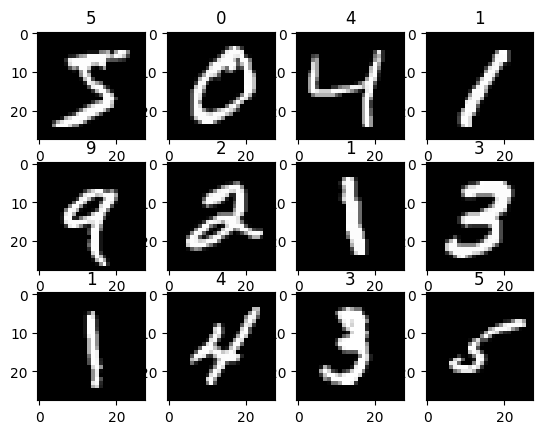

In [137]:
# preprcossed:
alexnet_trans = models.AlexNet_Weights.DEFAULT.transforms()
train_dataset,test_dataset = get_MNIST(alexnet_trans)
train_dataloader,test_dataloader = get_dataloader(train_dataset,test_dataset)
# show:
show_MNIST(train_dataset,test_dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


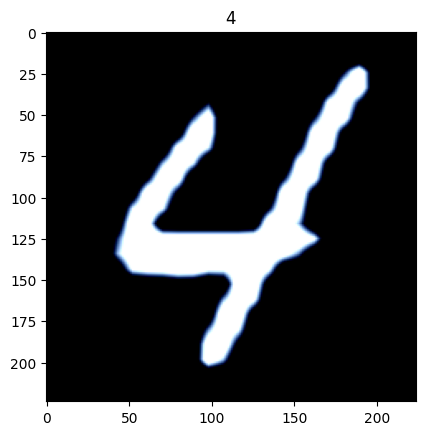

In [157]:
# Transform数据检查：
for _ ,data in enumerate(train_dataloader):
    inputs,targets = data
    fig = plt.figure()
    plt.imshow(inputs[1].permute(1,2,0))
    plt.title('{}'.format(targets[1]))
    plt.show()
    plt.close(fig)
    break

In [145]:
# Finetune AlexNet
# optimizer:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.parameters(),lr=0.001)
# train:
def finetune(model,train_dataloader):
    epoch = 5
    loss_lists = []
    for e in range(epoch):
        train_loss = 0
        total = 0
        correct = 0
        for _ ,data in enumerate(train_dataloader):
            optimizer.zero_grad()
            inputs,targets = data
            # train
            outputs = model(inputs)
            loss = criterion(outputs,targets)
            # loss
            loss.backward()
            optimizer.step()
            
            # compute:
            train_loss += loss.item()
            _,predicted = torch.max(outputs.data,dim=1)
            total+=inputs.shape[0]
            correct+=(targets==predicted).sum().item()
            
            
        # save loss:
        loss_lists.append(loss.detach().numpy())
        acc = correct/total*100
        print("epoch {}: loss {} acc {}".format(e,loss,acc))

    # show:
    fig = plt.figure()
    plt.plot(np.arange(0,len(loss_lists),1),loss_lists)
    plt.show()
    plt.close(fig)

In [136]:
# prediction
def predict(test_model,test_dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs,targets = data
            outputs = test_model(inputs)
            _,predicted = torch.max(outputs.data,dim=1)
            correct+=(targets==predicted).sum().item()
            total += inputs.shape[0]
            break
            
        acc = correct/total
    return acc

In [131]:
# AlexNet predict:
acc = test(alexnet,test_dataloader)
print("Accuracy on test:{}%".format(acc*100))

tensor([9, 9, 9, 8, 9, 9, 9, 9, 0, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9,
        0, 9, 9, 7, 9, 9, 0, 0, 0, 8, 8, 9, 9, 9, 8, 9, 7, 9, 7, 9, 9, 9, 8, 9,
        9, 9, 8, 9, 7, 0, 0, 9, 9, 9, 0, 9, 0, 9, 0, 9])
Accuracy on test:4.6875%
